# Teil 2 der Semesterarbeit: Parallel- und Zentralprojektionen  
  
Dozent: Markus Geuss    
Student: Theologos Baxevanos  
Fach: Linear Algebra  
Semester: HS20  
Schule: Fern Fachhochschule Schweiz

Deadline: Montag,  26.10.2020

## Inhaltsverzeichnis

### 1. Theorie  
1.1 Parallelprojektion   
1.2 Zentralprojektion


### 2. Implementierung mit Python  
2.1 GitHub Link  
2.2 Parallelprojektion in Python   
2.3 Zentralprojektion in Python

### 3. Quellen

### 3. Credits

-------------------------------

## 1. Theorie

Wieso Peojektionen und was sind die Kameramodelle?  
Nachdem alle Objekte einer Szenerie mittels der Transformationen im 3D-Weltkoordinatensystem platziert sind, muss die Szenerie aus verschiedenen Blickwinkeln auf eine 2D-Bildfläche projiziert werden.
Dazu verwendet man eine virtuelle Kamera, die wie folgt definiert ist:  
• Ihre Position ist durch die Koordinaten eines Punkts gegeben. [1]   
• Der Bildausschnitt ist rechtwinklig.  
• Ihr Schärfebereich ist unendlich gross.  

Man verwendet zwei Typen von Projektionen, die **Parallel-** und die **Zentralprojektion** [1] :
![im2](im2.png)

## 1.1 Parallelprojektion  
  
Bei einer Parallelprojektion verlaufen die Projektionsgeraden parallel zueinander.  

Es gibt zwei Untertypen:  
- bei **orthogonaler Projektion** stehen die Projektionsstrahlen senkrecht auf der Projektionsebene.
- bei **schiefwinkliger Projektion** nicht. 
Die **Projektionsrichtung** wird durch einen normierten **Vektor** p gegeben.

Für Vektoren p , die parallel zu den Koordinatenachsen sind, ergeben sich als Bilder die sechs Hauptrisse (Grundriss, Aufriss, Seitenriss) eines Objekts. [1]

Ein Beispiel [3]:  
![pp](parp.png)

Was bedeutet das Mathematisch?  
  
Wir können zuerst den einfachen Fall betrachen, dass die Projektionsebene mit der $x1$ $x2$-Ebene zusammenfällt und dort auch das $x1$ $x2$-Koordinatensystem gewählt wird. Dann werden bei der Projektion einfach alle $x3$-Koordinaten auf 0 abgebildet, die übrigen bleiben gleich [1].  
Nun ein Beispiel einer orthogonalen Projektion mit homogene Koordinaten:
 

H = $$\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

Wählt man eine andere Ebene parallel zur $x1$ $x2$-Ebene, etwa die Ebene $x3 = d$, so werden alle $x3$-Koordinaten auf $d$ abgebildet. Soll schließlich der Ursprung des Bildkoordinatensystems nicht $(0, 0, d)$ sein, sondern $(b, c, d)$, so ist noch ein Translationsanteil hinzuzufügen [1].

N = $$\begin{pmatrix} 1 & 0 & 0 & b \\ 0 & 1 & 0 & c \\ 0 & 0 & 0 & d \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

## 1. 2 Zenralprojektion

Mit der allgemeineren Form der homogenen Koordinaten, man kann damit eine weitere Klasse von nicht-linearen Abbildungen von $R2$ nach $R2$ als homogene Matrizen darstellen, und zwar **Zentralprojektionen**.

Beispiel [2]:
![zp](imagexx1.png)

Um einen Punkt $P$ zu projizieren, wird er mit dem Nullpunkt verbunden und
dann auf den Schnittpunkt $P′$ der Verbindungsgeraden mit der durch $y = d$
gegebenen Geraden abgebildet. Diese Abbildung ist nicht linear. Zum Bei-
spiel haben die beiden Punkte $(xP, yP + 1$) und $(xP, yP − 1)$ dieselbe Entfer-
nung von $P$. Aber ihre Projektionen werden nicht dieselbe Entfernung von $P′$
haben, d.h. Streckenverhältnisse auf Geraden bleiben nicht erhalten. [1]

Obwohl die **Zentralprojektion nicht linear** ist, *lässt sie sich jedoch durch eine **homogene Matrix** darstellen*. 

Dazu muss man sich lediglich überlegen, wie die Koordinate $x′P$ des Punktes $P′$ berechnet wird.
Man hat es offenbar mit zwei ähnlichen rechtwinkligen Dreiecken zu tun, so dass die Verhältnisse $x′P/xP$ und $d/yP$ übereinstimmen. Das bedeutet, dass man $x′P$ durch $xP * (d/yP)$ berechnen kann. [1] Jetzt multiplizieren wir $[xP, yP, 1]^T$ mit der folgenden Matrix:

M = $$\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1/d & 0 \end{pmatrix}$$

Das Ergebnis ist $[xP, yP, yP/d]^T$ 

Somit haben wir homogene Koordinaten für den Punkt $P′$ berechnet haben. Die homogene Matrix $M$ beschreibt also unsere **Zentralprojektion**.

#### Nun sehen wir beide Darstellungen nebeneinander um sie besser vergleichen zu können [3]:
![beide](beide.png)

# 2. Implementierung mit Python

## 2.1 GitHub Link für den Sourcecode: https://github.com/greatmerlin/parallel_und_zentralprojektionen.git

## 2.2  Parallelprojektion in Python

In [210]:
######################################
# AUFGABE 1
# Erstellen Sie eine Pythonfunktion, um ein Parallelepiped mit einer Paralleprojektion  auf der 𝑥𝑦 Ebene 
# darzustellen.
# Die Funktion soll als Argumente ein Parallelepiped und einen Richtungsvektor für die Projektionsrichtung
# verwenden
######################################

In [211]:
# Projektionsrichtungsfunction

def parallel(a, b, c, d, e, f, g, h, p, q, w):
    points = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])
    
    Z = np.zeros((8,3))
    for i in range(8): Z[i,:] = np.dot(points[i,:],P)
    Z = 10.0*Z
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    r = [-1,1]

    X, Y = np.meshgrid(r, r)

    # plot vertices
    ax.scatter3D(Z[:, p], Z[:, q], Z[:, w])

    # Liste der Seitenpolygone der Figur
    verts = [[Z[a],Z[b],Z[c],Z[d]],
     [Z[e],Z[f],Z[g],Z[h]], 
     [Z[a],Z[b],Z[f],Z[e]], 
     [Z[c],Z[d],Z[h],Z[g]], 
     [Z[b],Z[c],Z[g],Z[f]],
     [Z[e],Z[h],Z[d],Z[a]]]

    # plot Seiten
    ax.add_collection3d(Poly3DCollection(verts, 
     facecolors='green', linewidths=1, edgecolors='r', alpha=.25))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

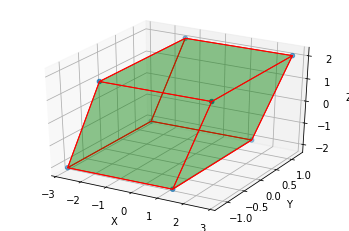

In [212]:
# Die Funktion nimmt als Argumente ein Parallelepiped und einen Richtungsvektor für die Projektionsrichtung

# (a, b, c, d, e, f, g, h) ist das Parallepiped. (Werte zwischen 0-7) Epfohlehne Werte: 0, 1, 2, 3, 4, 5, 6, 7

# (p, q, w) ist der Richtungsvektor (Werte zwischen 0-3) Epfohlene Werte: 0, 1, 2


parallel(0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2)

## 2.2  Zentralprojektion in Python

In [213]:
######################################
# AUFGABE 2
# Erstellen Sie eine Pythonfunktion, um ein Zentral mit einer Paralleprojektion  auf der 𝑥𝑦 Ebene 
# darzustellen.
# Die Funktion soll als Argumente ein Parallelepiped und ein Projektionszentrum (Kamera) verwenden;
# die Funktion sollte eine Matplotlib-Graphik erstellen
######################################

In [214]:
# Um eine Funktion die als Argumente ein Parallelepiped und ein Projektionszentrum (Kamera) verwendet, 
# werde ich einen anderen Ansatz als die Parallelprojektion implementieren

In [267]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [268]:
class Parallelepiped:
    
    def __init__(self, vector_a, vector_b, vector_c):
        
        if (len(vector_a) != 3) or (len(vector_b) != 3) or (len(vector_c) != 3):
            raise BaseException('At least one vector has not 3 dimensions')
        if (self.__linear_independency(vector_a, vector_b) == True) \
        and (self.__linear_independency(vector_a, vector_c) == True) \
        and (self.__linear_independency(vector_b, vector_c) == True):    
            self.a = vector_a
            self.b = vector_b
            self.c = vector_c
            self.cube_points = [
                np.array([0,0,0]), 
                self.a,
                self.b,
                self.c,
                self.a + self.c,
                self.a + self.b,
                self.b + self.c,
                self.a + self.b + self.c
            ]
        else:
            raise BaseException('At least two vectors are linear dependent')
    
    def getVolume(self):
        
        return np.abs(np.cross(self.a,self.c) @ self.b)
      
    def getCubePoints(self):
        
        return self.cube_points
    
    def getEdges(self, cube_points = []):
        
        if len(cube_points) == 0:
            cube_points = self.cube_points
            
        cube_edges = [
            (cube_points[0], cube_points[1]),
            (cube_points[0], cube_points[2]),
            (cube_points[0], cube_points[3]),
            (cube_points[1], cube_points[4]),
            (cube_points[1], cube_points[5]),
            (cube_points[2], cube_points[5]),
            (cube_points[2], cube_points[6]),
            (cube_points[3], cube_points[4]),
            (cube_points[3], cube_points[6]),
            (cube_points[4], cube_points[7]),
            (cube_points[5], cube_points[7]),
            (cube_points[6], cube_points[7]),
        ]
        return cube_edges
    
    def __linear_independency(self, a, b):
        
        res1 = a[0] / b[0]
        res2 = a[1] / b[1]
        res3 = a[2] / b[2]
        return not ((res1 == res2) and (res1 == res3) and (res2 == res3))

In [269]:
def lift_m(m):
    
    return np.array([[m[0][0],m[0][1],m[0][2], 0],
                     [m[1][0],m[1][1],m[1][2], 0],
                     [m[2][0],m[2][1],m[2][2], 0],
                     [0, 0, 0, 1]
                    ])

In [270]:
def lift_v(vector):
    
    return np.array(
        [vector[0] * view_distance, vector[1] * view_distance, vector[2] * view_distance, 1 * view_distance]
    )

In [271]:
def lower_v(vector):
    
    if vector[3] == 0:
        vector[3] = 0.001
    return np.array([vector[0] / vector[3], vector[1] / vector[3], vector[2] / vector[3]])

In [272]:
def translationMatrix(x = 0,y = 0,z = 0):
    
    return np.array([[1, 0, 0, x],
                 [0, 1, 0, y],
                 [0, 0, 1, z],
                 [0, 0, 0, 1]])

In [304]:
def plot_projection(parallelepiped, transformation_matrix):
    
    M = transformation_matrix
    
    points = []
    for point in parallelepiped.getCubePoints():
        points.append(lower_v(M @ lift_v(point)))
    
    for edge in parallelepiped.getEdges(points):
        x = [edge[0][0],edge[1][0]]
        y = [edge[0][1],edge[1][1]]
        
        plt.plot(x,y, color='red', linewidth=4)

In [305]:
def parallelProjectionMatrix(p):
    
    p_norm = p / np.linalg.norm(p)

    w = np.array([0,1,0])
    n = -p_norm
    u = np.cross(w, p_norm) / np.linalg.norm(np.cross(w, p_norm))
    v = -(np.cross(n, u))
    
    Kt = lift_m(np.array([u,v,n]))
    Vd = translationMatrix(z = p[2])
    
    M = Kt @ Vd
    return M

In [306]:
view_distance = 2

def centralProjectionMatrix(p):

    P = parallelProjectionMatrix(p)
    Pd = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 0],
                 [0, 0, -1/view_distance, 1]])
    
    M = Pd @ P
    return M

In [307]:
def plot_central_projection(parallelepiped, view_direction):
    
    M = centralProjectionMatrix(view_direction)
    
    plot_projection(parallelepiped, M)

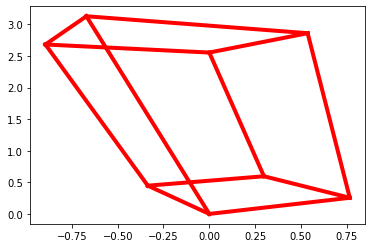

In [308]:
a = np.array([1,0,0])
b = np.array([0,0,1])
c = np.array([1,2,0])

obj = Parallelepiped(a,b,c)

view_direction = np.array([2,-2,-1])

plot_central_projection(obj, view_direction)

## 3. Quellen

- [1] Moeller, B., 2020. Graphikprogrammierung. pp.18-28.    
- [2] Weitz, E., 2018. Konkrete Mathematik (Nicht Nur) Für Informatiker. Wiesbaden, Germany: Springer  
- [3] konstruieren, M. and Zentralprojektion, P., 2020. Zentralprojektion | Sofatutor.Com. [online] sofatutor.com. Available at: <https://www.sofatutor.com/mathematik/videos/zentralprojektion> [Accessed 25 October 2020].

## 4. Credits  
  
Hier möchte ich mit bei Herr Markus Geuss für das Erklärvideo zur Zentralprojektion herzlich bedanken, was mir die Theorie bzg. Zentralprojektion erläutert hat und Thierry Girod für seine Unterstützung in den Python Code für die Zentralprojektion. 